# Final Project Term Paper
Faculty for Environment and Natural Resources
Module „Supply chain modelling, indicators and responsibility “, Sommer term 2023

## Step 1: Pre-process data

In [139]:
import pandas as pd
import os

hbs_exp = pd.read_excel("hbs_data/quantile/UK/eurostat_hbs_exp_2015.xlsx")
hbs_str = pd.read_excel("hbs_data/quantile/UK/eurostat_hbs_str_2015.xlsx")

In [140]:
hbs_exp.drop(hbs_exp.tail(1).index, inplace=True)  # drop 'Total' row
hbs_exp

,Unnamed: 0,quantile,geo,year,value
0,777,QUINTILE1,UK,2015,13365
1,811,QUINTILE2,UK,2015,17381
2,845,QUINTILE3,UK,2015,23715
3,879,QUINTILE4,UK,2015,28915
4,913,QUINTILE5,UK,2015,43219


In [141]:
hbs_str

,Unnamed: 0,quantile,coicop,geo,year,value
0,36918,QUINTILE1,CP011,UK,2015,0.124
1,36951,QUINTILE1,CP012,UK,2015,0.011
2,37018,QUINTILE1,CP021,UK,2015,0.016
3,37051,QUINTILE1,CP022,UK,2015,0.014
4,37084,QUINTILE1,CP023,UK,2015,0.000
...,...,...,...,...,...,...
230,46514,QUINTILE5,CP123,UK,2015,0.009
231,46547,QUINTILE5,CP124,UK,2015,0.014
232,46580,QUINTILE5,CP125,UK,2015,0.033
233,46613,QUINTILE5,CP126,UK,2015,0.001


In [142]:
# merge dfs on 'quantile' column, ignoring 'geo' and 'year' columns
abs_exp_full = hbs_str.merge(hbs_exp[["quantile", "value"]], on="quantile", how="right")

# create absolute value column and clean up columns
abs_exp_full.set_index("coicop", inplace=True)
abs_exp_full["value"] = abs_exp_full.value_x * abs_exp_full.value_y
abs_exp_full.drop(columns=["value_x", "value_y", "Unnamed: 0"], inplace=True)

abs_exp_full

,quantile,geo,year,value
coicop,,,,
CP011,QUINTILE1,UK,2015,1657.260
CP012,QUINTILE1,UK,2015,147.015
CP021,QUINTILE1,UK,2015,213.840
CP022,QUINTILE1,UK,2015,187.110
CP023,QUINTILE1,UK,2015,0.000
...,...,...,...,...
CP123,QUINTILE5,UK,2015,388.971
CP124,QUINTILE5,UK,2015,605.066
CP125,QUINTILE5,UK,2015,1426.227


In [143]:
# transpose/pivot table
abs_exp = abs_exp_full.pivot(columns="quantile", values="value")
abs_exp

quantile,QUINTILE1,QUINTILE2,QUINTILE3,QUINTILE4,QUINTILE5
coicop,,,,,
CP011,1657.260,2207.387,2822.085,3267.395,4062.586
CP012,147.015,191.191,260.865,289.150,345.752
CP021,213.840,278.096,379.440,491.555,734.723
CP022,187.110,208.572,237.150,173.490,172.876
CP023,0.000,0.000,0.000,0.000,0.000
CP031,347.490,625.716,877.455,1214.430,1988.074
CP032,80.190,156.429,260.865,318.065,432.190
CP041,3675.375,2902.627,2418.930,2139.710,1901.636
CP042,0.000,0.000,0.000,0.000,0.000


---
#### ___OPTIONAL___: Alternative solution and comparison
---

`pandas.merge()` function can be replaced with the following two operations:
- a function to check each case of quintile argument
- list comprehension to iterate over the rows

In [144]:
# define quantile check function
def quintile_check(argument):
    """Hard-code value checks"""
    match argument:
        case "QUINTILE1":
            return 13365
        case "QUINTILE2":
            return 17381
        case "QUINTILE3":
            return 23715
        case "QUINTILE4":
            return 28915
        case "QUINTILE5":
            return 43219


# perform list comprehension
exp_list = [quintile_check(x) for x in hbs_str["quantile"]]

The rest is the same as above method.

In [145]:
abs_exp_alt = hbs_str.copy(deep=True)  # create an unlinked copy
abs_exp_alt["exp_vals"] = exp_list
abs_exp_alt.set_index("coicop", inplace=True)
abs_exp_alt["value2"] = abs_exp_alt.value * abs_exp_alt.exp_vals
abs_exp_alt.drop(columns=["value", "exp_vals", "Unnamed: 0"], inplace=True)
abs_exp_alt.rename(
    columns={"value2": "value"}, inplace=True
)  # rename column for direct df comparison
abs_exp_alt

,quantile,geo,year,value
coicop,,,,
CP011,QUINTILE1,UK,2015,1657.260
CP012,QUINTILE1,UK,2015,147.015
CP021,QUINTILE1,UK,2015,213.840
CP022,QUINTILE1,UK,2015,187.110
CP023,QUINTILE1,UK,2015,0.000
...,...,...,...,...
CP123,QUINTILE5,UK,2015,388.971
CP124,QUINTILE5,UK,2015,605.066
CP125,QUINTILE5,UK,2015,1426.227


Comparing the two methods:

In [146]:
print("Both methods give the same result:", abs_exp_full.equals(abs_exp_alt))
print("The following differences between dataframes were found:")
abs_exp_full.compare(abs_exp_alt)

Both methods give the same result: True
The following differences between dataframes were found:


coicop


We can therefore confirm that our original use of `pandas.merge()` function was indeed correct.

Out of interest, let's do a rudimentary comparison of performance for both methods.

In [147]:
print("Pandas performance test:")
%timeit abs_exp = hbs_str.merge(hbs_exp[['quantile', 'value']], on='quantile', how='right')
print("\nList comprehension performance test:")
%timeit exp_list = [quintile_check(x) for x in hbs_str['quantile']]

Pandas performance test:


610 µs ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

List comprehension performance test:
25.3 µs ± 152 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Interestingly, we see that the list comprehension method is an order of magnitude faster than the pandas function. In general, pandas operations are extremely well optimized and we're comparing apples to oranges here (or lists to dataframes). Additionally, the `match` case statement is hard-coded by hand and does not process the dataframe automatically. Nevertheless, we can see the value in this method as an alternative to the one-liner, should the user be confused by the pandas documentation as I originally was.

---

### Question 1: What COICOP category shows the highest expenditure for each different group from your cross-sectional variable? If the category differs between groups, why do you think this is the case?

In [148]:
# max values per Quintiles
print("Maximum expenditure COICOP categories: ", abs_exp.idxmax())
print("\nUnique categories:", abs_exp.idxmax().unique())

Maximum expenditure COICOP categories:  quantile
QUINTILE1    CP041
QUINTILE2    CP041
QUINTILE3    CP011
QUINTILE4    CP011
QUINTILE5    CP011
dtype: object

Unique categories: ['CP041' 'CP011']


We observe two different COICOP groups for maximum expenditure:

- Actual rentals for housing [CP041] for the first 2 quintiles (as opposed to [CP042] Imputed rentals for housing)
- Food [CP011] for quintiles 3-5

This would imply that the poorer households tend to spend most of their money on rent, whereas the other quintiles spend most of their money on food. This is somewhat surprising, as intuitively we'd expect most of the household expenditures to be directed towards housing for practically all income quintiles.

In [149]:
# top 3 categories
abs_exp.nlargest(3, columns=abs_exp.columns)

quantile,QUINTILE1,QUINTILE2,QUINTILE3,QUINTILE4,QUINTILE5
coicop,,,,,
CP041,3675.375,2902.627,2418.930,2139.710,1901.636
CP011,1657.260,2207.387,2822.085,3267.395,4062.586
CP045,1015.740,1129.765,1233.180,1301.175,1599.103


Here [CP045] denotes Electricity, gas and other fuels. We notice that the Fuels and Rent is comparable within quintile 5, whereas quintiles 1&2 pay more than double for rent than for fuel. Food category remains relatively near the top for all quintiles, whereby we can assume that the upper quintiles are more likely to over-indulge in their cravings; this would explain the large gap in expenditures between economic groups.

For further inspection, consider the following graph:

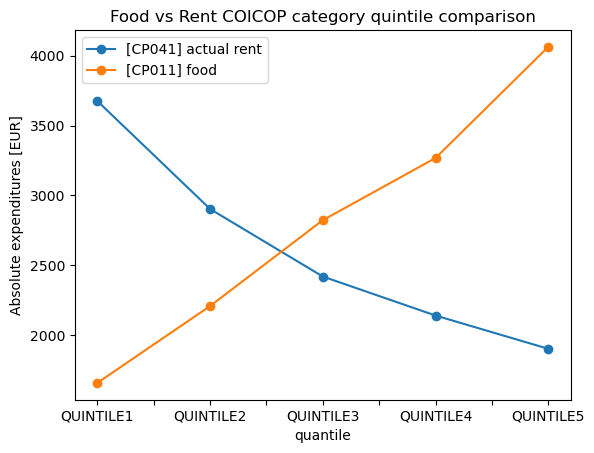

In [150]:
import matplotlib.pyplot as plt

foo = abs_exp.nlargest(2, columns=abs_exp.columns)
ax = foo.transpose().plot(marker="o")
ax.legend(["[CP041] actual rent", "[CP011] food"])
ax.set_ylabel("Absolute expenditures [EUR]")
ax.set_title("Food vs Rent COICOP category quintile comparison")
plt.show()

We observe the following trends across quintiles:
- rent consumption decreases exponentially (or at least linearly; need more data points to be more conclusive)
- food consumption increases linearly 

In [151]:
# consider the imputed rentals for housing data
abs_exp.loc[["CP042"]]

quantile,QUINTILE1,QUINTILE2,QUINTILE3,QUINTILE4,QUINTILE5
coicop,,,,,
CP042,0.0,0.0,0.0,0.0,0.0


Unfortunately the CP042 category is missing data. I would have expected a linear growth of rentals per quintile groups.

### Question 2: What is the total expenditure by group? How do you explain the differences between groups?

In [152]:
# total expenditure by groups
abs_exp.sum()

quantile
QUINTILE1    13351.635
QUINTILE2    17346.238
QUINTILE3    23738.715
QUINTILE4    28857.170
QUINTILE5    43219.000
dtype: float64

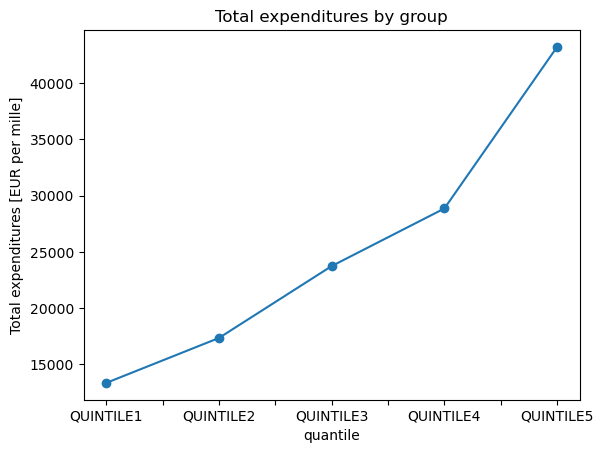

In [153]:
ax = abs_exp.sum().plot(marker="o")
ax.set_ylabel("Total expenditures [EUR per mille]")
ax.set_title("Total expenditures by group")
plt.show()

It's not surprising to see an increase in total expenditure across each consecutive quintile (it's practically expected by categorization): the rich spend more because they can.

In [154]:
# export to Excel
if os.path.exists("abs_exp.xlsx") is False:
    abs_exp.to_excel("abs_exp.xlsx")
    print("File exported successfully.")
else:
    print("File already exported. Delete & rerun cell to update.")

File already exported. Delete & rerun cell to update.
